In [121]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
import seaborn as seaborn

In [132]:
dataframe = pandas.read_csv("datasets/cinemalytics.csv")

dataframe.shape

(963338, 23)

In [130]:
dataframe.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'popularity', 'poster_path',
       'genres'],
      dtype='object')

In [133]:
dataframe.drop(["backdrop_path", "homepage", "imdb_id", "original_language", "original_title", "tagline", "spoken_languages", "production_companies", "production_countries", "overview"], axis = 1, inplace = True)

In [125]:
dataframe.dtypes

id                int64
title            object
vote_average    float64
vote_count        int64
status           object
release_date     object
revenue           int64
runtime           int64
adult              bool
budget            int64
popularity      float64
poster_path      object
genres           object
dtype: object

In [134]:
dataframe["release_date"] = pandas.to_datetime(dataframe["release_date"])

dataframe["title"] = dataframe["title"].astype(str)

dataframe["status"] = dataframe["status"].astype(str)

dataframe["poster_path"] = dataframe["poster_path"].astype(str)

dataframe["genres"] = dataframe["genres"].astype(str)

In [135]:
dataframe.dtypes

id                       int64
title                   object
vote_average           float64
vote_count               int64
status                  object
release_date    datetime64[ns]
revenue                  int64
runtime                  int64
adult                     bool
budget                   int64
popularity             float64
poster_path             object
genres                  object
dtype: object

In [136]:
dataframe["status"].unique()

array(['Released', 'Planned', 'Post Production', 'In Production',
       'Rumored', 'Canceled'], dtype=object)

In [137]:
filter = ["Planned", "In Production", "Rumored", "Post Production", "Canceled"]

dataframe.drop(dataframe[dataframe["status"].isin(filter)].index, inplace = True)

In [138]:
dataframe["status"].unique()

array(['Released'], dtype=object)

In [116]:
dataframe.shape

(949155, 23)

In [139]:
dataframe.drop(["status"], axis = 1, inplace = True)

In [27]:
dataframe.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'popularity', 'poster_path', 'genres'],
      dtype='object')

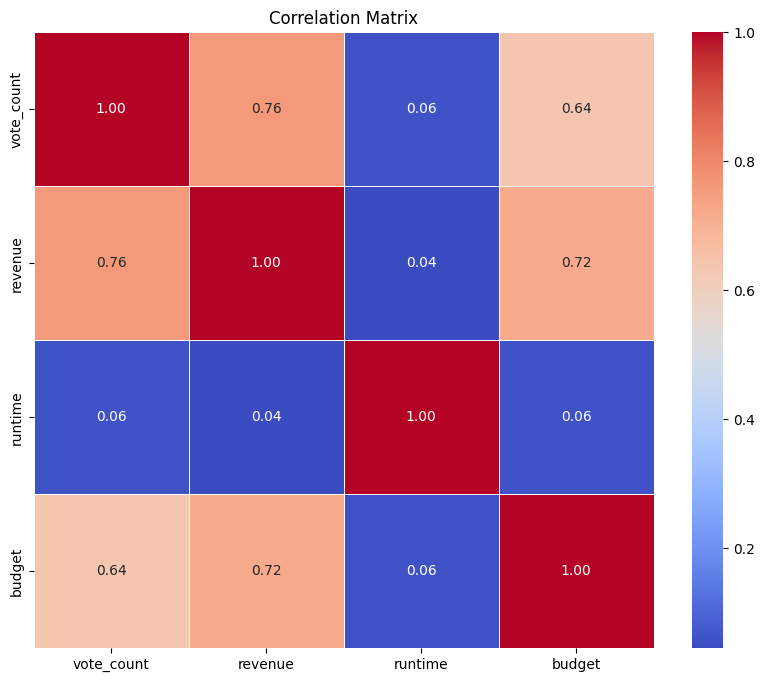

In [28]:
integer_columns = dataframe.select_dtypes(include = "int64").columns

if "id" in integer_columns:
    integer_columns = integer_columns.drop("id")

selected_data = dataframe[integer_columns]

correlation_matrix = selected_data.corr()

plot.figure(figsize = (10, 8))
seaborn.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = .5)
plot.title("Correlation Matrix")
plot.show()

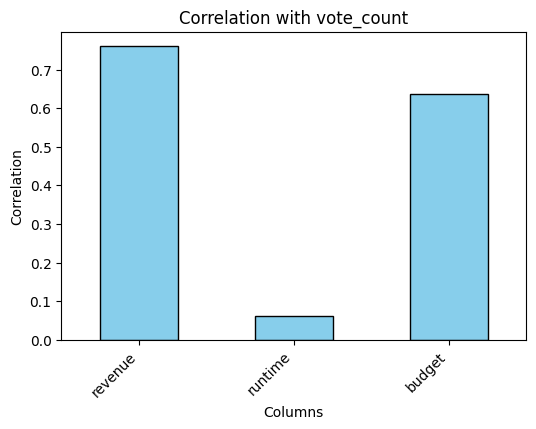

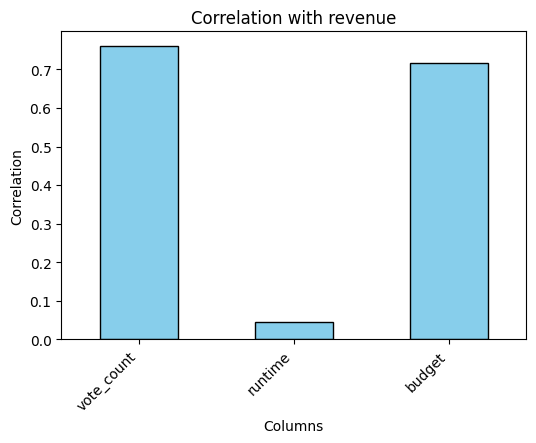

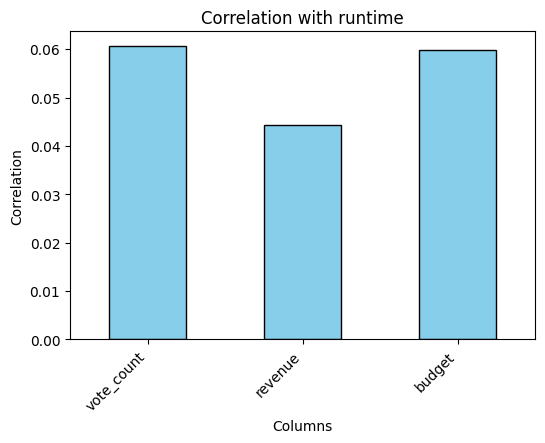

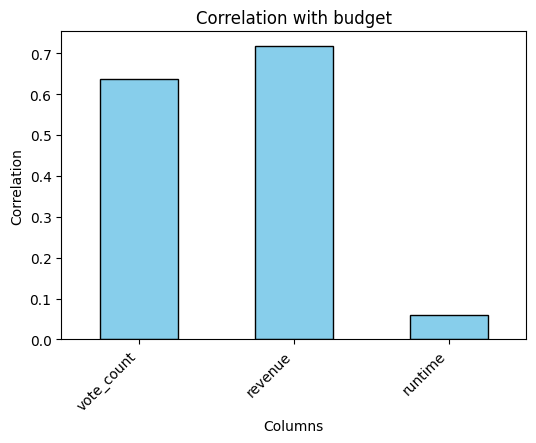

In [29]:
integer_columns = dataframe.select_dtypes(include = "int64").columns

if "id" in integer_columns:
    integer_columns = integer_columns.drop("id")

selected_data = dataframe[integer_columns]

correlation_matrix = selected_data.corr()

for column in correlation_matrix.columns:
    plot.figure(figsize = (6, 4))
    correlation_values = correlation_matrix[column].drop(column) 
    correlation_values.plot(kind = "bar", color = "skyblue", edgecolor = "black")
    plot.title(f"Correlation with {column}")
    plot.xlabel("Columns")
    plot.ylabel("Correlation")
    plot.xticks(rotation = 45, ha = "right")
    plot.show()


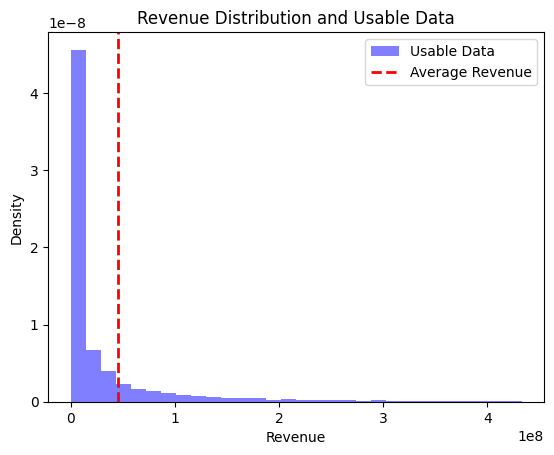

Average Revenue: 45601926.48723527
Standard Deviation: 129331557.24527486
Number of Usable Data Points: 15326


In [140]:
dataframe.replace("nan", pandas.NA, inplace = True)
dataframe = dataframe[~dataframe.apply(lambda row: any(row == pandas.NA), axis = 1)]
dataframe.dropna(inplace = True)
notnull = dataframe[(dataframe["revenue"] > 0) & (dataframe["vote_count"] != 0) & (dataframe["runtime"] != 0)] 

average_revenue = notnull["revenue"].mean()
standard_deviation = notnull["revenue"].std()
threshold = 3
usable_data = notnull[(notnull["revenue"] >= average_revenue - threshold * standard_deviation) & (notnull["revenue"] <= average_revenue + threshold * standard_deviation)]

plot.hist(usable_data["revenue"], bins = 30, density = True, alpha = 0.5, color = "b", label = "Usable Data")
plot.axvline(average_revenue, color = "r", linestyle = "dashed", linewidth = 2, label = "Average Revenue")
plot.legend()
plot.xlabel("Revenue")
plot.ylabel("Density")
plot.title("Revenue Distribution and Usable Data")
plot.show()

print(f"Average Revenue: {average_revenue}")
print(f"Standard Deviation: {standard_deviation}")
print(f"Number of Usable Data Points: {len(usable_data)}")


In [141]:
dataframe.isnull().sum()

id              0
title           0
vote_average    0
vote_count      0
release_date    0
revenue         0
runtime         0
adult           0
budget          0
popularity      0
poster_path     0
genres          0
dtype: int64

In [142]:
usable_data.to_csv("datasets/output.csv", index = False)

In [92]:
dataframe.replace("nan", pandas.NA, inplace = True)
dataframe = dataframe[~dataframe.apply(lambda row: any(row == pandas.NA), axis = 1)]
dataframe.dropna(inplace = True)
notnull = dataframe[(dataframe["revenue"] > 0) & (dataframe["vote_count"] != 0) & (dataframe["runtime"] != 0)] 

median_nonzero = notnull["revenue"].median()

Q1 = notnull["revenue"].quantile(0.25)
Q3 = notnull["revenue"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

quantile_range = notnull[(notnull["revenue"] >= lower_bound) & (notnull["revenue"] <= upper_bound)]

print(f"Median Budget (excluding zero values): {median_nonzero}")
print(f"25th Percentile of Budget (excluding zero values): {Q1}")
print(f"75th Percentile of Budget (excluding zero values): {Q3}")
print("\nData points within the 25th to 75th percentile range:")
print(quantile_range[["title", "revenue"]])

Median Budget (excluding zero values): 5218666.0
25th Percentile of Budget (excluding zero values): 553171.0
75th Percentile of Budget (excluding zero values): 30718107.0

Data points within the 25th to 75th percentile range:
                                        title   revenue
14                   The Shawshank Redemption  28341469
86                                The Shining  44781695
135                                  Whiplash  13092000
139                                   Memento  39723096
140     Eternal Sunshine of the Spotless Mind  72258126
...                                       ...       ...
344725             The Story of Martin Luther       103
344739                              Room Zero        11
345244                    The Royal Nightmare       267
345341                          Going Furthur     15000
345485               Last Time in Clerkenwell       844

[13408 rows x 2 columns]


In [93]:
dataframe.isnull().sum()

id              0
title           0
vote_average    0
vote_count      0
status          0
release_date    0
revenue         0
runtime         0
adult           0
budget          0
popularity      0
poster_path     0
genres          0
dtype: int64

In [94]:
quantile_range.to_csv("datasets/output.csv", index = False)